<a href="https://colab.research.google.com/github/PritishRane/Deep-Learning/blob/main/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout


In [3]:
dataset = pd.read_csv('Mental Health Dataset.csv')

In [4]:
dataset.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [9]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Preprocessing function

In [10]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)


# Preprocess the posts

In [11]:
texts = dataset['posts'].astype(str).apply(preprocess_text).values
labels = dataset['predicted'].values


# Encode labels

In [12]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [15]:
X_train

array(['granddaughter graduate th grade last night wish husband celebrate every milestone achieve special age diagnose acute lymphoblastic leukemia week later husband diagnose pancreatic cancer go chemotherapy together become bald together endure many painful procedure tonight granddaughter alive thrive leukemia survivor alas john pass month bond together cancer face death one pass one survive hope john look smile watch abby cross stage graduation alive survivor sometimes think john know god want another soul heaven would go abby stay hope john able see abby thrive laugh normal young lady know john would proud wish celebrate abbys life future miss love much today learn meet',
       'speak friend mine able get hold week make long story short tell son justin diagnose leukemia easter hospital speechless say offer love encouragement course live quite hour away son bear within week sit think poor little justin pain chemotherapy treatment endure make feel guilty feel bad anything please pra

# Tokenize and pad sequences

In [16]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build the CNN-LSTM model

In [17]:
embedding_dim = 128
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels)), activation='softmax')
])

# Compile the model

In [19]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [21]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4567 - loss: 1.1592 - val_accuracy: 0.6392 - val_loss: 0.8701
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7056 - loss: 0.7919 - val_accuracy: 0.7013 - val_loss: 0.8234
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7909 - loss: 0.6084 - val_accuracy: 0.6772 - val_loss: 0.8740
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8524 - loss: 0.4495 - val_accuracy: 0.7023 - val_loss: 0.8818
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8950 - loss: 0.3434 - val_accuracy: 0.6845 - val_loss: 1.0073
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9222 - loss: 0.2641 - val_accuracy: 0.6849 - val_loss: 1.0916
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9451 - loss: 0.1977 - val_accuracy: 0.6787 - val_loss: 1.2222
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9531 - loss: 0.1636 - val_accuracy:

# Evaluate the model

In [22]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6889 - loss: 1.3940
Test Loss: 1.4656528234481812, Test Accuracy: 0.6849446892738342


# Generate predictions

In [23]:
y_pred = np.argmax(model.predict(X_test_padded), axis=-1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [24]:
print(y_pred)

[1 3 3 ... 0 1 1]


In [38]:
ypred_1=label_encoder.inverse_transform(y_pred)
ypred_1

array(['neutral', 'very negative', 'very negative', ..., 'negative',
       'neutral', 'neutral'], dtype=object)

In [39]:
y_test

array([1, 3, 3, ..., 0, 0, 1])

In [40]:
y_test_1=label_encoder.inverse_transform(y_test)
y_test_1

array(['neutral', 'very negative', 'very negative', ..., 'negative',
       'negative', 'neutral'], dtype=object)

 # Calculate accuracy and F1 score

In [26]:
from sklearn.metrics import classification_report, accuracy_score, f1_score


In [27]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [28]:
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")

Accuracy: 0.684944684944685
F1 Score: 0.6813517360744886


# Classification report

In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
                precision    recall  f1-score   support

     negative       0.64      0.70      0.67       793
      neutral       0.78      0.77      0.77       905
     positive       0.34      0.25      0.29       128
very negative       0.64      0.56      0.59       253

     accuracy                           0.68      2079
    macro avg       0.60      0.57      0.58      2079
 weighted avg       0.68      0.68      0.68      2079



# Plot training and validation accuracy and loss

In [33]:
import matplotlib.pyplot as plt

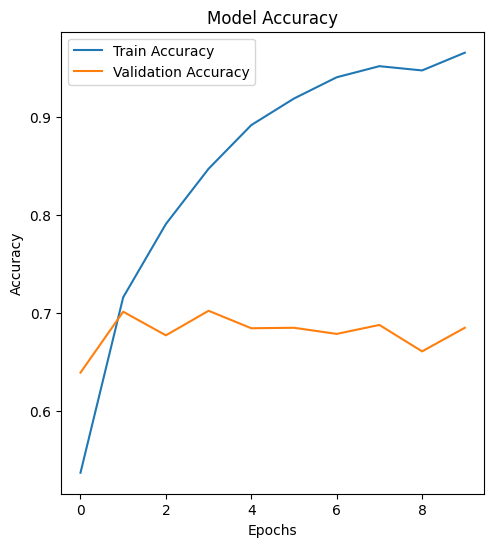

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

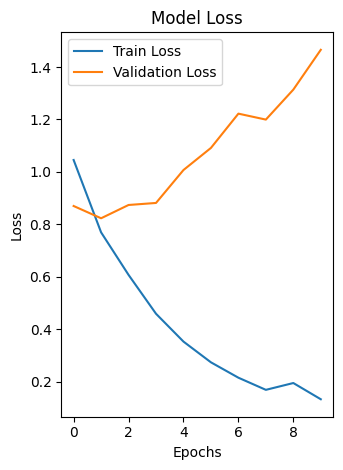

In [35]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
model.save('cnn-lstm.keras')